In [31]:
## for data
import pandas as pd
import numpy as np

## for statistical test
import scipy

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition


In [32]:
input_dict = pd.read_pickle("./input/gestures_4d_full.pkl")

In [33]:
print("type of input_dict:", type(input_dict))
print("keys:", input_dict.keys())

type of input_dict: <class 'dict'>
keys: dict_keys(['labels', 'data'])


In [34]:
print(type(input_dict['labels']))
print(type(input_dict['data']))

<class 'list'>
<class 'numpy.ndarray'>


In [35]:
print("shape of ndarray:", input_dict['data'].shape)

shape of ndarray: (7420, 120, 67, 3)


In [36]:
# defineing labels id's of left, right and both side

lefthand_labels = [2,5,8,18,20,23,26,29,31,33,35,37,39,41,44,52]
righthand_labels = [1,4,7,9,17,19,22,25,28,30,32,34,36,38,40,43]
bothhand_labels = [0,3,6,10,11,12,13,14,15,16,21,24,27,42,45,46,47,48,49,50,51]

labels = np.array(input_dict['labels'])
data = input_dict['data']

In [37]:
# creating mask for left right and both hands
# to filter the idx for each hands respectively 


mask = np.zeros_like(labels, dtype=bool)        # initialize mask with zeros
for id in lefthand_labels:
    maskid = labels == id
    mask = mask + maskid

lefthand_data = data[mask]
lefthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in righthand_labels:
    maskid = labels == id
    mask = mask + maskid

righthand_data = data[mask]
righthand_labels = labels[mask]


mask = np.zeros_like(labels, dtype=bool)        # reset mask
for id in bothhand_labels:
    maskid = labels == id
    mask = mask + maskid

bothhand_data  = data[mask]
bothhand_labels = labels[mask]


In [38]:
print("lefthand_data shape:", lefthand_data.shape)
print("righthand_data shape:", righthand_data.shape)
print("bothhand_data shape:", bothhand_data.shape)

print("sum_data shape:", lefthand_data.shape[0] + righthand_data.shape[0] + bothhand_data.shape[0])

print("lefthand_labels shape:", lefthand_labels.shape)
print("righthand_labels shape:", righthand_labels.shape)
print("bothhand_labels shape:", bothhand_labels.shape)

lefthand_data shape: (2053, 120, 67, 3)
righthand_data shape: (2021, 120, 67, 3)
bothhand_data shape: (3346, 120, 67, 3)
sum_data shape: 7420
lefthand_labels shape: (2053,)
righthand_labels shape: (2021,)
bothhand_labels shape: (3346,)


In [39]:
# Defining labels into three target classes
# lefthand_labels = -1
# righthand_labels = 1
# bothhand_labels = 0

lefthand_target = np.ones_like(lefthand_labels) * -1
righthand_target = np.ones_like(righthand_labels)
bothhand_target = np.zeros_like(bothhand_labels)

print(lefthand_target.shape)
print(righthand_target.shape)
print(bothhand_target.shape)

(2053,)
(2021,)
(3346,)


In [40]:
all_labels = np.concatenate((lefthand_target, righthand_target, bothhand_target), axis=0)

all_data = np.concatenate((lefthand_data, righthand_data, bothhand_data), axis=0)

print(all_labels.shape)
print(all_data.shape)

(7420,)
(7420, 120, 67, 3)


In [63]:
from sklearn.model_selection import train_test_split

## split the data into tain test set: cross validation
train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=0.33, random_state=21)

In [64]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(4971, 120, 67, 3)
(2449, 120, 67, 3)
(4971,)
(2449,)


In [71]:
## Reshape the 4-dimensional numpy array into a 2-dimensional numpy array
train = train.reshape(train_data.shape[0], -1)
print("train data reshape dim:", train.shape)

## Reshape the 4-d numpy-array into a 2-d numpy-array
test = test.reshape(test_data.shape[0],-1)
print("test data reshape dim:", test.shape)

train data reshape dim: (4971, 24120)
test data reshape dim: (2449, 24120)


### sklearn.naive_bayes.GaussianNB

In [72]:
from sklearn.naive_bayes import GaussianNB

## initlize our classifiers
gnb = GaussianNB()

## train our classifier
model_all_gnb = gnb.fit(train, train_labels)

In [73]:
## Make predictions
preds = gnb.predict(test)
print(preds)

[ 1  0 -1 ... -1  0  0]


In [74]:
## write a plotting function for confusion matrix

import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

score = accuracy_score(test_labels, preds)
print("accuracy:   %0.4f" % score)

cm = confusion_matrix(test_labels, preds)


accuracy:   0.9159


Confusion matrix, without normalization


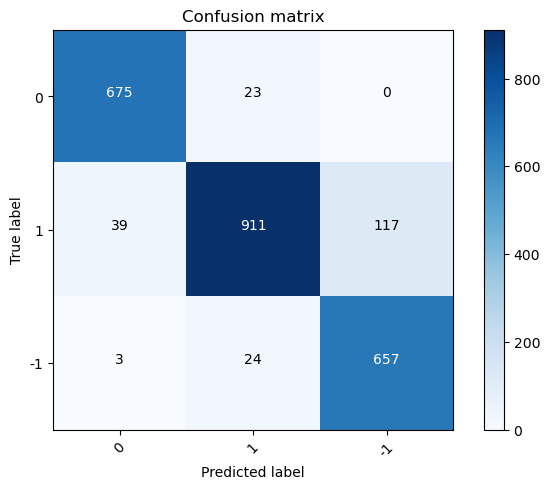

In [76]:
plot_confusion_matrix(cm, classes=['0', '1', '-1'])

In [96]:
from sklearn.manifold import TSNE

# Load the data

# Define the t-SNE model
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

# Fit the model to the data
train_tsne = tsne.fit_transform(train)

In [97]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

naive_bayes = GaussianNB()
svc = SVC(kernel="rbf", gamma=0.001)

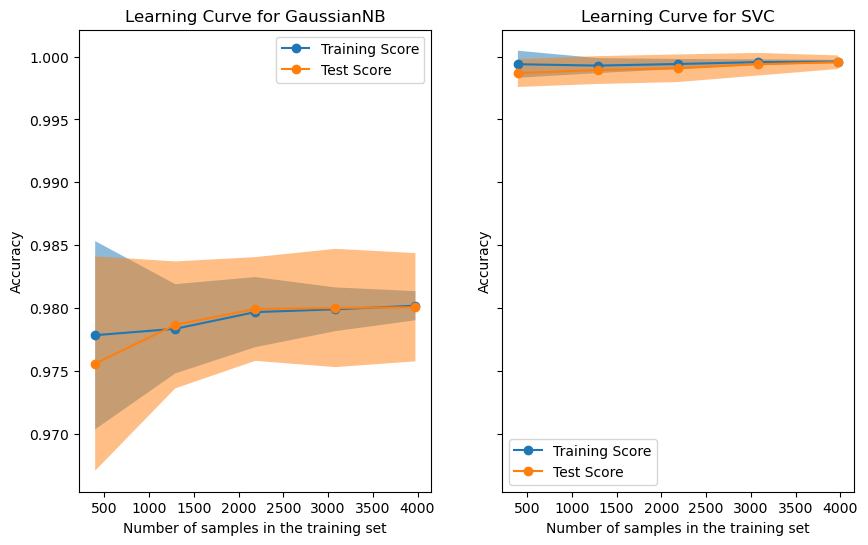

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": train_tsne,
    "y": train_labels,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")